# Introduction to Coordinate Reference System with GeoPandas

- Dennis Milechin, P.E., GISP
- <a href="http://rcs.bu.edu">Research Computing Services</a>


# Workshop Outcomes

1. Get exposed to GeoPandas Python library syntax and CRS functions. 
1. Learn about Coordinate Reference System (CRS) and their implications on a GIS project.


# Outline

1. Introducing GeoPandas
1. Importing and Plotting Data
1. Understanding Datum/Geographic Coordinate System
1. Understanding Projections and Impact on Analysis
1. Selecting Coordinate Reference System


# Introducing GeoPandas

> GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. 

<sup>source: https://geopandas.org/index.html</sup>

__Note:__ GeoPandas is for processing vector data.

User Guide: https://geopandas.org/docs/user_guide.html

### Prerequisites to use GeoPandas

1. Need Python 3 installed on your machine.
1. Dependency packages need to be installed.
1. GeoPandas needs to be installed.
1. One needs to know Python scripting language.
1. Familiarity with "pandas" and "matplotlib" packages will make things easier.

### Setup Instructions

See the Git repository for instructions on setting up a conda GeoPandas environment to run this notebook.  
https://github.com/milechin/tut_geopandas_crs

Settings some styling and enabling interactive plots for this notebook.

In [1]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Makes plots interactive
%matplotlib notebook

import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

# Importing and Plotting Data

Our objective:  
1. Show North American countries.
1. Show boundaries of the US states.
1. Show ports and harbor locations in Alaska.

First we need to import the geopandas library.

In [2]:
import geopandas

Now use the "read_file" function to load a GIS dataset into memory.

<IPython.core.display.Javascript object>


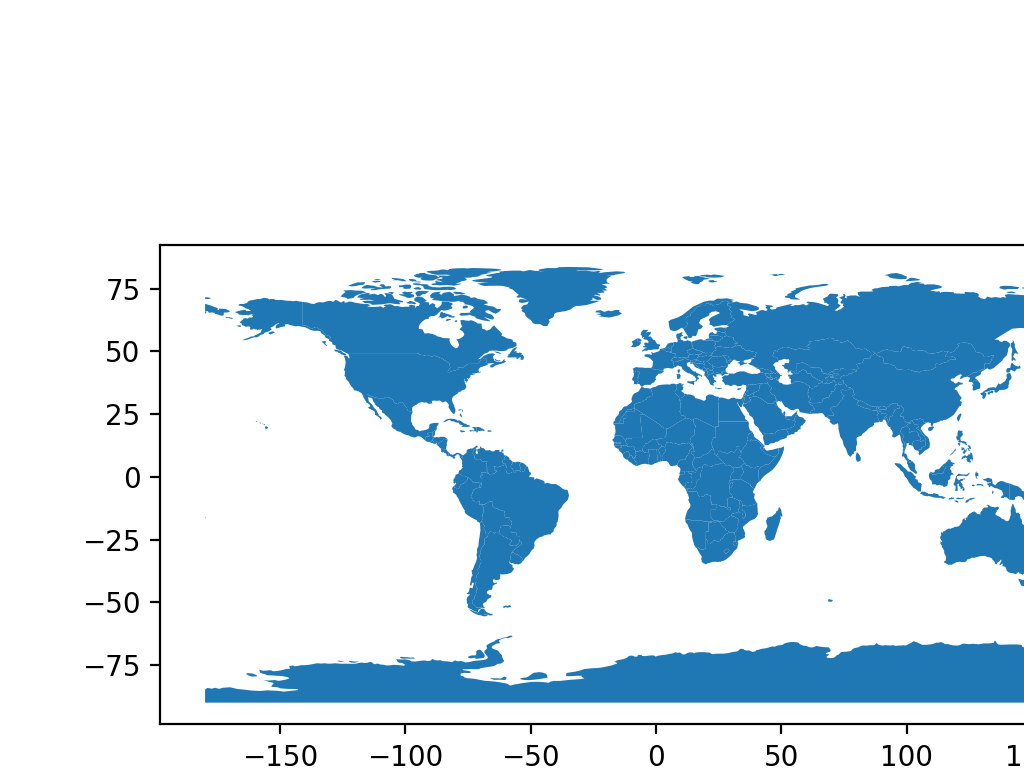

<AxesSubplot:>

In [3]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()

<b>Vector</b> GIS data (such as points, lines, and polygons) have an <b>attribute table</b> associated with it. 

In [4]:
# List the first 5 line of the attribute table.
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Let's filter the data to only include features that are in North America.

<IPython.core.display.Javascript object>


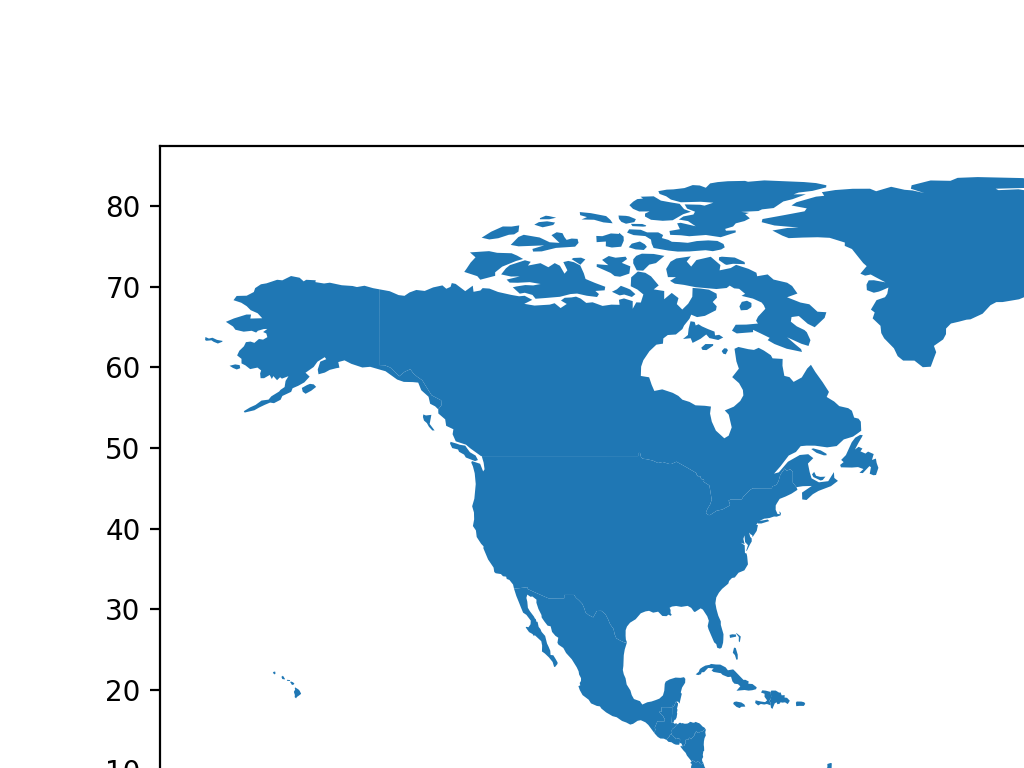

<AxesSubplot:>

In [5]:
north_america = world[world["continent"] == "North America"]
north_america.plot()

We want to show US state boundaries, so we load a shapefile that contains this data.

<IPython.core.display.Javascript object>


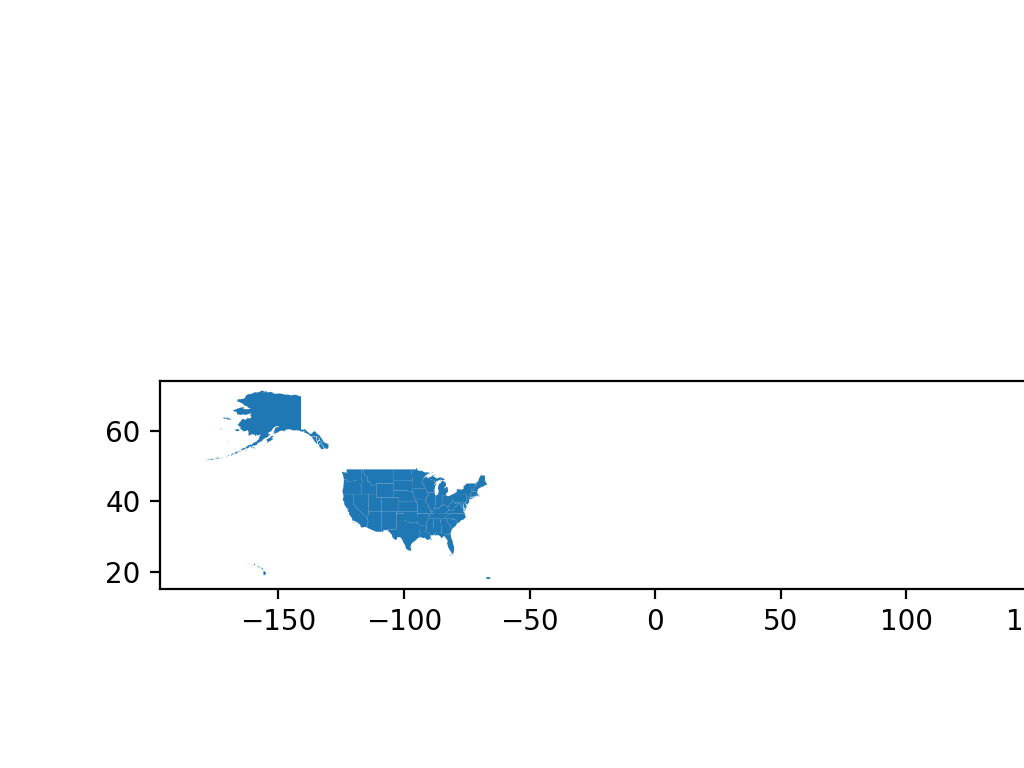

<AxesSubplot:>

In [6]:
state_bounds = geopandas.read_file("tutorial_files/state_bounds/cb_2018_us_state_20m.shp")
state_bounds.plot()

Let's plot our two layers together on one map.

<IPython.core.display.Javascript object>


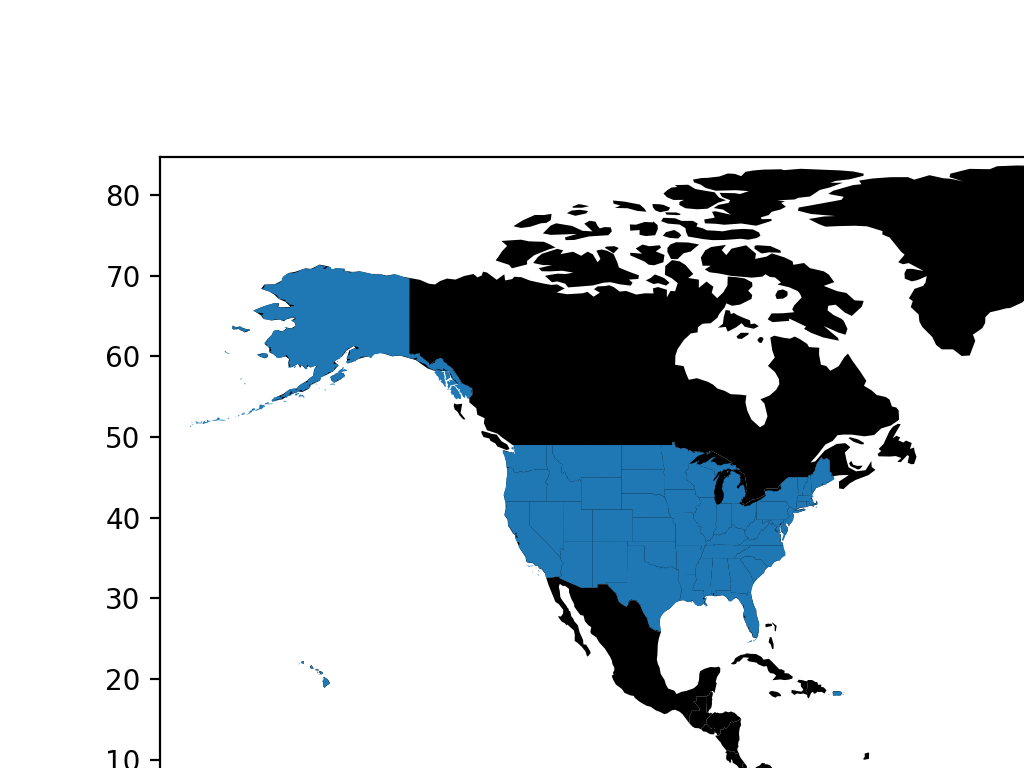

<AxesSubplot:>

In [7]:
# Save the returned object from the "plot" function as "base".
base = north_america.plot(color="black") 
# Specify the "base" object as an argument for the axis to plot on.
state_bounds.plot(ax=base)

Load the Ports and Harbors of Alaska dataset.

<IPython.core.display.Javascript object>


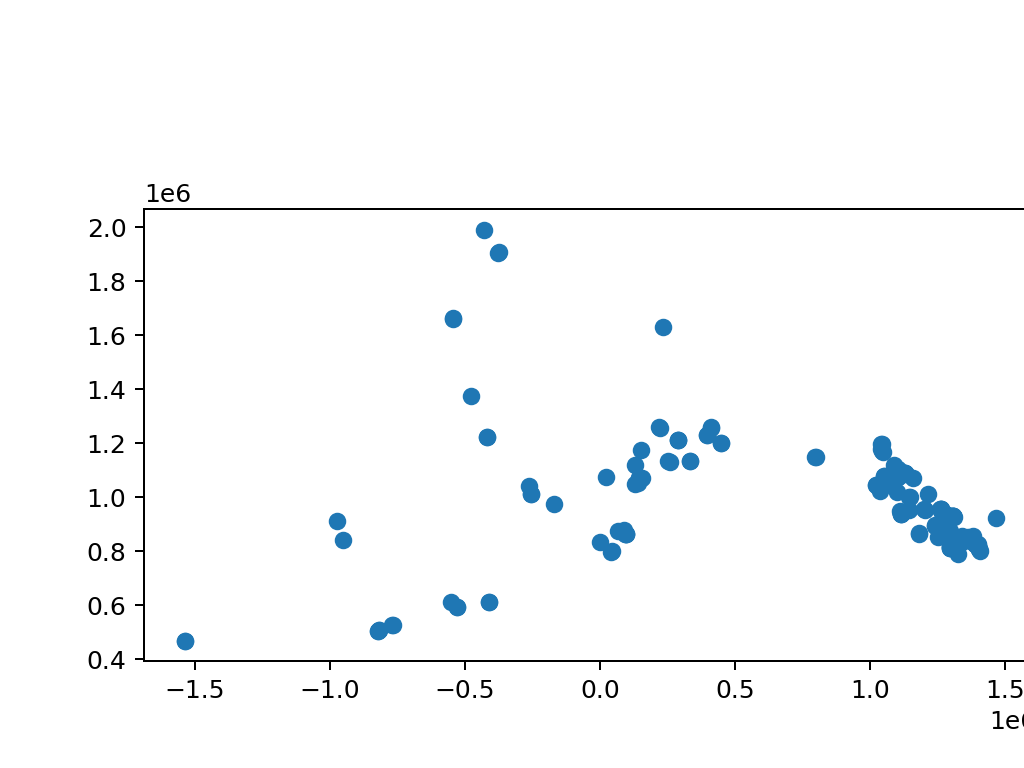

<AxesSubplot:>

In [8]:
ak_ports_harbors = geopandas.read_file("tutorial_files/ak_ports_harbors/Ports_and_Harbors.shp")
ak_ports_harbors = ak_ports_harbors.to_crs("epsg:3467")
ak_ports_harbors.plot()

Let's plot all three layers together on one map.

<IPython.core.display.Javascript object>


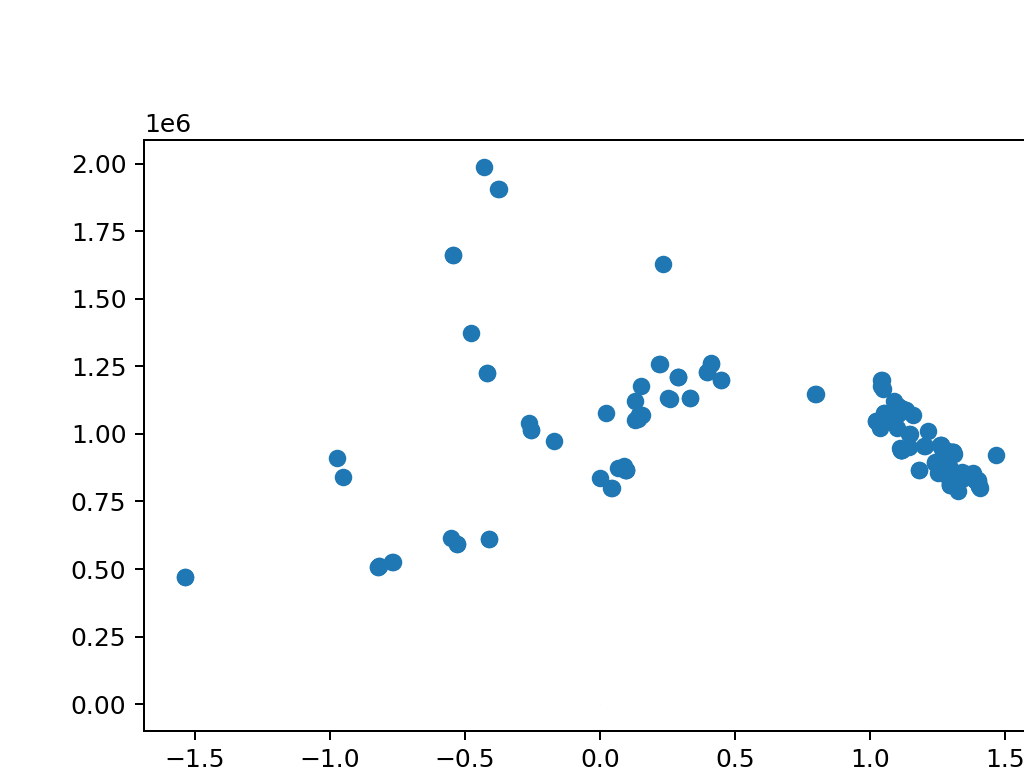

<AxesSubplot:>

In [9]:
base = north_america.plot(color="black") 
state_bounds.plot(ax=base)
ak_ports_harbors.plot(ax=base)


# Understanding Datum/Geographic Coordinate System

### Step 1: Model a General Shape of the Earth (Datum)

The earth is generally round, but is not a perfect sphere or very smooth (e.g. mountains and canyons).

![alt text](files/images/datum.png)


Source: https://www.e-education.psu.edu/geog862/book/export/html/1669 

### Geographic Coordinate System (GCS)
![alt text](files/images/gcs.png)

Source: http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm

### Geographic Coordinate System (GCS)

GCS help define a reference system for finding a location on the datum.

<img src="files/images/gcs_combined.png" alt="compass" style="width:500px"/>

Source: http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/geographic-coordinate-system.htm

### Geographic Coordinate System (GCS)
__Coordinates are associated with a specific GCS.__  Below is an outline of Boston City Hall.  The same coordinates were used to plot the outlines in two different GCSs.

<img src="files/images/GCS_comparison.png" alt="gcs_comparison" style="width:700px;"/>

The proper GCS for these coordinates is NAD 1927.

## Let's go back to our original project.

### GeoPandas CRS Functions

<table>
<colgroup>
<col style="width: 10%" />
<col style="width: 90%" />
</colgroup>
<tbody>
<tr ><td><p><a href="https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.crs.html#geopandas.GeoDataFrame.crs">GeoDataFrame.crs</a></p></td>
<td><p>The Coordinate Reference System (CRS) represented as a pyproj.CRSobject.</p></td>
</tr>
<tr><td><p><a href="https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.to_crs.html#geopandas.GeoDataFrame.to_crs">GeoDataFrame.to_crs()</a></p></td>
<td><p>Transform geometries to a new coordinate reference system.</p></td>
</tr>
<tr><td><p><a href="https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.set_crs.html#geopandas.GeoDataFrame.set_crs">GeoDataFrame.set_crs()</a></p></td>
    <td><p>Set the Coordinate Reference System (CRS) of the GeoDataFrame. <b>### Only use if data does not have CRS defined! ###</b></p></td>
</tr>
</tbody>
</table>



In [10]:
north_america.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
state_bounds.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [12]:
ak_ports_harbors.crs

<Derived Projected CRS: EPSG:3467>
Name: NAD83(NSRS2007) / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meters)
- method: Albers Equal Area
Datum: NAD83 (National Spatial Reference System 2007)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Notice this layer indicates it is "projected". We will talk about this shortly.

Let's choose one CRS that we will use for this project.

In [13]:
project_crs = north_america.crs

state_bounds = state_bounds.to_crs(project_crs)
ak_ports_harbors = ak_ports_harbors.to_crs(project_crs)

Let's try it again.

<IPython.core.display.Javascript object>


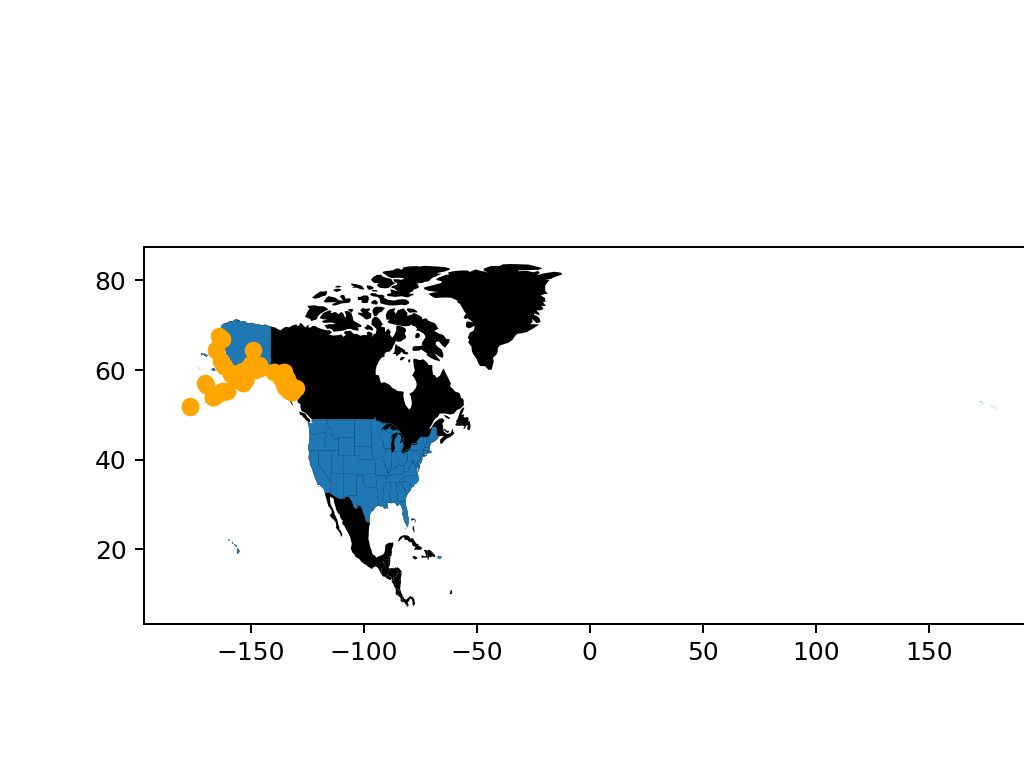

<AxesSubplot:>

In [14]:
base = north_america.plot(color="black") 
state_bounds.plot(ax=base)
ak_ports_harbors.plot(ax=base, color="orange")

# Understanding Projections and Impact on Analysis

### Projections

- Allow creation of flat maps
- At the expense of distorting:
  - shape
  - area
  - direction
  - distance
 


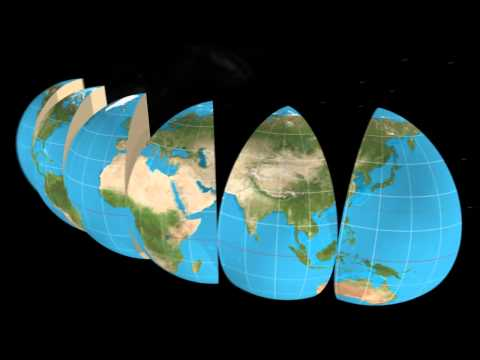

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo('CPQZ7NcQ6YQ', width=800, height=500)

There are two types of projections:
    
- Geographic Projection - Decimal Coordinates
- Projected Projection - Coordinates in Feet or Meters

One way to visualizes distortions is by using Tissot's circles.

In [16]:
tissots = geopandas.read_file("tutorial_files/tissots_circles/Tissots_circles.shp")
# Convert CRS for Tissot's Circle to that of the "world" object.
tissots = tissots.to_crs(world.crs) 

<IPython.core.display.Javascript object>


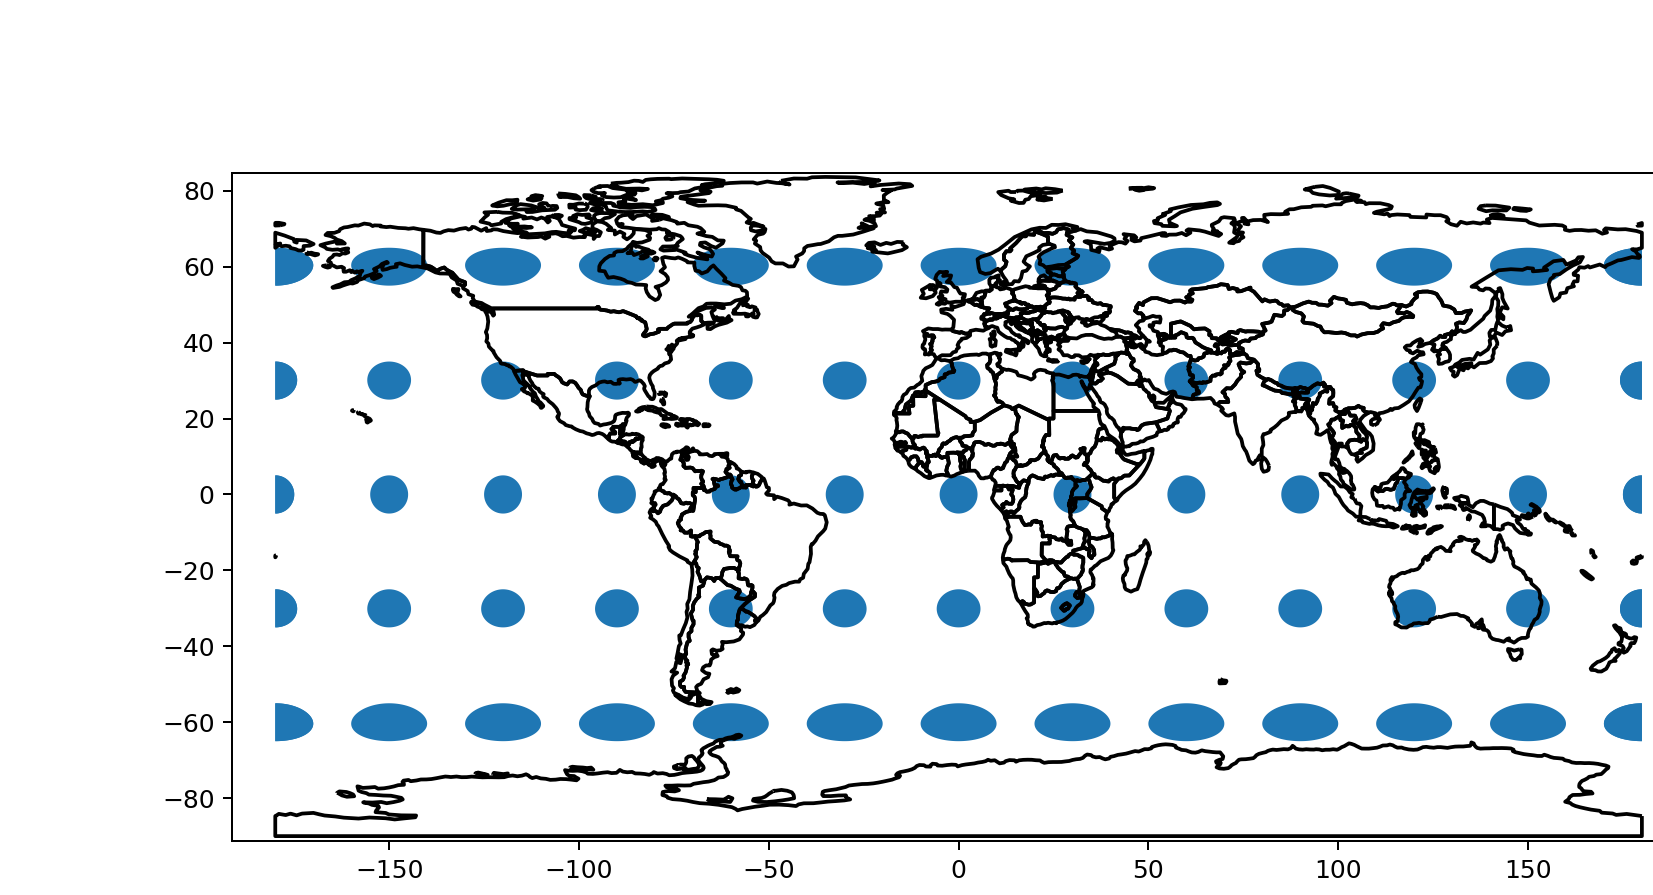

<AxesSubplot:>

In [17]:
base = world.boundary.plot(color="black")
tissots.plot(ax=base)

### GeoPandas Accepted Definitions


- CRS WKT string
- __An authority string (i.e. “epsg:4326”)__
- __An EPSG integer code (i.e. 4326)__
- A pyproj.CRS
- An object with a to_wkt method.
- PROJ string
- Dictionary of PROJ parameters
- PROJ keyword arguments for parameters
- JSON string with PROJ parameters

<sup> source: https://geopandas.org/docs/user_guide/projections.html </sup>

### EPSG Codes

You can find library of EPSG codes at:  
https://epsg.io/  
https://spatialreference.org/ref/epsg/

Lets's transform our CRS to "NAD83 / Conus Albers" - EPSG code 5070 (https://epsg.io/5070)

<IPython.core.display.Javascript object>


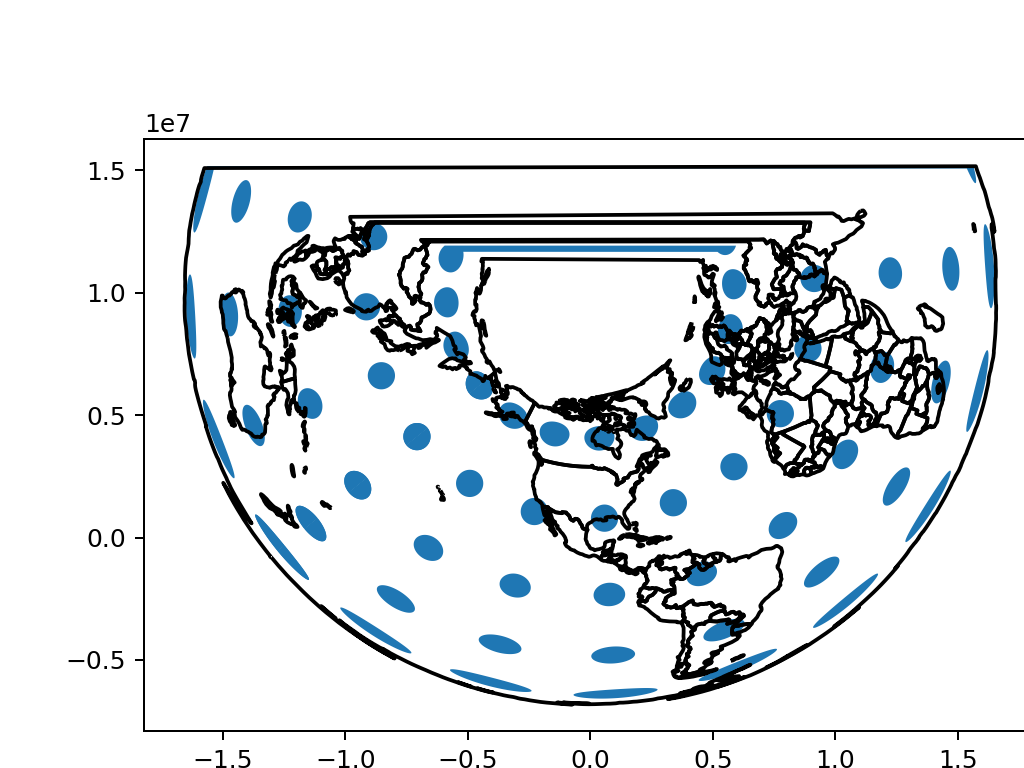

<AxesSubplot:>

In [18]:
world_epsg5070 = world.to_crs("epsg:5070")
tissots_epsg5070 = tissots.to_crs("epsg:5070")
base = world_epsg5070.boundary.plot(color="black")
tissots_epsg5070.plot(ax=base)

Lets's transfor our CRS to "WGS 84 / Antarctic Polar Stereographic" - EPSG code 3031 (https://epsg.io/3031)

<IPython.core.display.Javascript object>


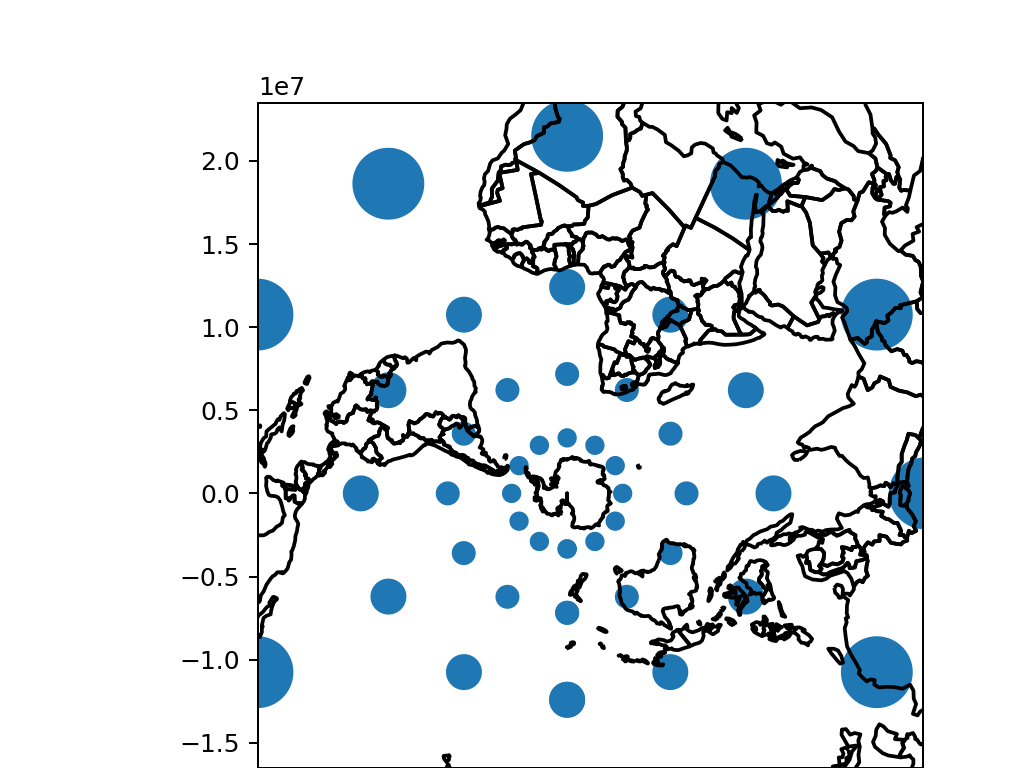

<AxesSubplot:>

In [19]:
world_epsg3031 = world.to_crs("epsg:3031")
tissots_epsg3031 = tissots.to_crs("epsg:3031")

base = world_epsg3031.boundary.plot(color="black")
tissots_epsg3031.plot(ax=base)

Let's calculate the area of Antarctica for each of these projections.

In [20]:
world[world["continent"] == "Antarctica"].area.sum()

/var/folders/n5/nd5z552s3kd51306kzph58x40000gp/T/ipykernel_11482/1401859224.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world[world["continent"] == "Antarctica"].area.sum()


6028.836194274539

Let's find out why....

In [21]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Let's inspect the EPSG 5070 projection.

In [22]:
world_epsg5070.crs

<Derived Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [23]:
world_epsg3031.crs

<Derived Projected CRS: EPSG:3031>
Name: WGS 84 / Antarctic Polar Stereographic
Axis Info [cartesian]:
- E[north]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Antarctica.
- bounds: (-180.0, -90.0, 180.0, -60.0)
Coordinate Operation:
- name: Antarctic Polar Stereographic
- method: Polar Stereographic (variant B)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Let's calculate the area of Antarctica with each projection and compare it to the true area. 

In [24]:
# True Antartica area is about 14.2 Million sq. kilometers
true_area_antarctica = 14.2

epsg5060_area_m = world_epsg5070[world_epsg5070["continent"] == "Antarctica"].area.sum()
epsg3031_area_m = world_epsg3031[world_epsg3031["continent"] == "Antarctica"].area.sum()

print("Difference between calculated area using a projection and true area of Antarctica.\n")
print("EPSG 5060: " + str(epsg5060_area_m/1000000**2 - true_area_antarctica) + " million sq. km")
print("EPSG 3031: " + str(epsg3031_area_m/1000000**2 - true_area_antarctica) + " million sq. km")

Difference between calculated area using a projection and true area of Antarctica.

EPSG 5060: 595.2543479423729 million sq. km
EPSG 3031: -2.141833784126513 million sq. km


# Selecting a Coordinate Reference System

###  Selecting CRS

- __What CRS do I choose?__
  - Check if institutions or organization requires the use of a specific CRS.
  - Choose one that minimizes distortion characteristics important for your analysis.

- __When to assign CRS?__
  - GIS data does not have a CRS defined.
    
- __When to transform from one CRS to another CRS?__
  - Prior to spatial processing of two layers.
  - Plotting layers on a map.
  - Some GIS tools expect projected data.


### Additional Resources

- <a href="http://geokov.com/education/map-projection.aspx">Map Projections - types and distortion patterns</a>
- <a href="https://www.axismaps.com/guide/general/map-projections/">Map Projections</a>
- <a href="https://alastaira.wordpress.com/2011/01/23/the-google-maps-bing-maps-spherical-mercator-projection/">The Google Maps / Bing Maps Spherical Mercator Projection</a>
- <a href="http://bl.ocks.org/syntagmatic/raw/ba569633d51ebec6ec6e/">Exploratory Projection Widget</a>
- <a href="https://www.earthdatascience.org/">Earth Lab</a>

# Questions?


## Data Sources
- Tissot Circle - https://mgimond.github.io/ArcGIS_tutorials/Tissot_circle.htm  
- State Boundaries - https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
- AK Ports and Harbors - https://gis.data.alaska.gov/datasets/DCCED::ports-and-harbors/about